In [2]:
# 日付データの特徴量
import pandas as pd
# 10時間の頻度の datetime 列
s = pd.date_range("2020-01-06", "2020-01-10", freq="10H").to_series()

In [5]:
# datetime から特徴量を
features = {
    "dayofweek": s.dt.dayofweek.values,
    "dayofyear": s.dt.dayofyear.values,
    "hour": s.dt.hour.values,
    "is_leap_year": s.dt.is_leap_year.values,
    "quater": s.dt.quarter.values,
    "weekofyear": s.dt.weekofyear.values
}

In [7]:
features

{'dayofweek': array([0, 0, 0, 1, 1, 2, 2, 2, 3, 3]),
 'dayofyear': array([6, 6, 6, 7, 7, 8, 8, 8, 9, 9]),
 'hour': array([ 0, 10, 20,  6, 16,  2, 12, 22,  8, 18]),
 'is_leap_year': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]),
 'quater': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'weekofyear': array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])}

In [9]:
# p.147 のデータがないため作成
example_df = pd.DataFrame([
  {
    "date": "2016-09-01",
    "customer_id": 146361,
    "cat1": 2,
    "cat2": 2,
    "cat3": 0,
    "num1": -0.518679
  },
  {
    "date": "2017-04-01",
    "customer_id": 180838,
    "cat1": 4,
    "cat2": 1,
    "cat3": 0,
    "num1": 0.415853
  },
  {
    "date": "2017-08-01",
    "customer_id": 157857,
    "cat1": 3,
    "cat2": 3,
    "cat3": 1,
    "num1": -2.061687
  },
  {
    "date": "2017-12-01",
    "customer_id": 159772,
    "cat1": 5,
    "cat2": 1,
    "cat3": 1,
    "num1": -0.276558
  },
  {
    "date": "2017-09-01",
    "customer_id": 80014,
    "cat1": 3,
    "cat2": 2,
    "cat3": 1,
    "num1": -1.456827
  }
])

In [11]:
example_df.head()

,date,customer_id,cat1,cat2,cat3,num1
0,2016-09-01,146361,2,2,0,-0.518679
1,2017-04-01,180838,4,1,0,0.415853
2,2017-08-01,157857,3,3,1,-2.061687
3,2017-12-01,159772,5,1,1,-0.276558
4,2017-09-01,80014,3,2,1,-1.456827


In [14]:
def genearate_features(df: pd.DataFrame):
    df.loc[:, "year"] = df["date"].dt.year
    df.loc[:, "weekofyear"] = df["date"].dt.weekofyear
    df.loc[:, "month"] = df["date"].dt.month
    df.loc[:, "dayofweek"] = df["date"].dt.dayofweeks
    df.loc[:, "weekend"] = (df["date"].dt.weekday >= 5).astype(int)
    
    aggs = {}
    aggs["month"] = ["nunique", "mean"]
    aggs["weekofyear"] = ["nunique", "mean"]
    aggs["num1"] = ["sum", "max", "min", "mean"]
    aggs["customer_id"] = ["size"]
    aggs["customer_id"] = ["nunique"]
    
    # customer_id を軸に集約
    agg_df = df.groupby("customer_id").agg(aggs)
    agg_df = agg_df.reset_index()
    return agg_df

In [17]:
example_df["date"] = pd.to_datetime(example_df["date"])

In [19]:
example_result = genearate_features(example_df)

In [21]:
example_result.head()

customer_id   month      weekofyear           num1                      \
              nunique mean    nunique mean       sum       max       min   
0       80014       1    9          1   35 -1.456827 -1.456827 -1.456827   
1      146361       1    9          1   35 -0.518679 -0.518679 -0.518679   
2      157857       1    8          1   31 -2.061687 -2.061687 -2.061687   
3      159772       1   12          1   48 -0.276558 -0.276558 -0.276558   
4      180838       1    4          1   13  0.415853  0.415853  0.415853   

            customer_id  
       mean     nunique  
0 -1.456827           1  
1 -0.518679           1  
2 -2.061687           1  
3 -0.276558           1  
4  0.415853           1

In [23]:
import numpy as np
# 100行2列の [0,1) の一様分布乱数のデータフレーム
df = pd.DataFrame(
    np.random.rand(100, 2),
    columns=[f"f_{i}" for i in range(1, 3)]
)
df.head()

,f_1,f_2
0,0.435921,0.280343
1,0.795443,0.049456
2,0.367548,0.266988
3,0.801111,0.919749
4,0.567674,0.780339


In [25]:
# 2次の多項式特徴量（a, b, ab, a^2 b^2）を作成
from sklearn import preprocessing
pf = preprocessing.PolynomialFeatures(
    degree=2,
    interaction_only=False,
    include_bias=False
)
pf.fit(df)

PolynomialFeatures(include_bias=False)

In [28]:
poly_feats = pf.transform(df)
type(poly_feats)

numpy.ndarray

In [30]:
poly_feats.shape

(100, 5)

In [32]:
# データフレーム作成
num_feats = poly_feats.shape[1]
df_transformed = pd.DataFrame(poly_feats, columns=[f"f_{i}" for i in range(1, num_feats + 1)])
df_transformed.head()

,f_1,f_2,f_3,f_4,f_5
0,0.435921,0.280343,0.190027,0.122208,0.078592
1,0.795443,0.049456,0.632730,0.039340,0.002446
2,0.367548,0.266988,0.135092,0.098131,0.071283
3,0.801111,0.919749,0.641779,0.736821,0.845938
4,0.567674,0.780339,0.322253,0.442978,0.608928


In [35]:
# ビニング
df["f_bin_10"] = pd.cut(df["f_1"], bins=10, labels=False)
df["f_bin_100"] = pd.cut(df["f_1"], bins=100, labels=False)
df.head()

,f_1,f_2,f_bin_10,f_bin_100
0,0.435921,0.280343,4,43
1,0.795443,0.049456,8,80
2,0.367548,0.266988,3,36
3,0.801111,0.919749,8,81
4,0.567674,0.780339,5,57


In [39]:
# 分散の大きい特徴量を追加
rng = np.random.default_rng()
df["f_3"] = np.round(rng.uniform(high=10000.0, size=(100, 1)))
df.head()

,f_1,f_2,f_bin_10,f_bin_100,f_3
0,0.435921,0.280343,4,43,4609.0
1,0.795443,0.049456,8,80,8770.0
2,0.367548,0.266988,3,36,4333.0
3,0.801111,0.919749,8,81,889.0
4,0.567674,0.780339,5,57,8398.0


In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([11., 12., 10.,  9.,  9.,  9., 12.,  8.,  9., 11.]),
 array([  77., 1065., 2053., 3041., 4029., 5017., 6005., 6993., 7981.,
        8969., 9957.]),
 <a list of 10 Patch objects>)

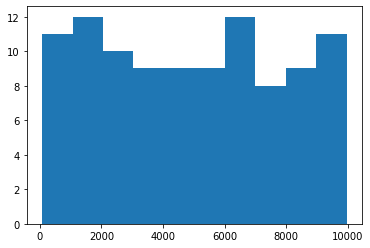

In [44]:
plt.hist(df["f_3"])

In [46]:
df["f_3"].var()

8439055.788282828

In [48]:
# 対数を取る
df["f_3"].apply(lambda x: np.log(1 + x)).var()

0.8435291805374731

(array([ 1.,  0.,  2.,  0.,  5.,  5., 15., 10., 23., 39.]),
 array([4.35670883, 4.8416511 , 5.32659337, 5.81153564, 6.29647791,
        6.78142018, 7.26636245, 7.75130472, 8.23624699, 8.72118926,
        9.20613153]),
 <a list of 10 Patch objects>)

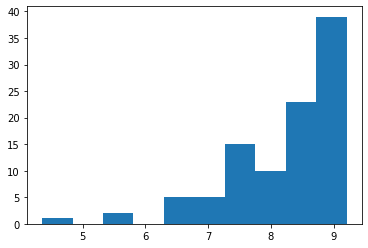

In [49]:
plt.hist(df["f_3"].apply(lambda x: np.log(1 + x)))

In [53]:
# K近傍法で量的変数の欠損値補完
from sklearn import impute

# 1~15 の値をランダムに取る 10 * 6 の行列
X = np.random.randint(1, 15, (10, 6)).astype(float)
# ランダムに10個欠損値にするための乱数生成
np.random.choice(X.size, 10)

array([27, 18, 23, 18, 39, 32, 53, 12, 59, 28])

In [55]:
# ravel() は一次元化するが、Xの形状自体は変わらない
print(X.ravel())
print(X.shape)

[ 6.  8.  1. 11. 11.  4.  9.  8. 12.  3.  3.  9.  7.  8.  9. 13.  3. 10.
 11.  7.  6.  5.  3. 11. 10.  6. 14. 13.  9.  6.  1.  8.  8.  1.  5. 14.
 10.  7. 12.  7.  3.  5.  5. 12. 12.  4.  5.  5. 11. 13. 11.  5.  7.  4.
 13.  4. 12.  3.  3.  5.]
(10, 6)


In [57]:
# ランダムに10個欠損値にする
X.ravel()[np.random.choice(X.size, 10)] = np.nan
print(X)

[[ 6.  8.  1. 11. 11. nan]
 [ 9. nan 12.  3. nan  9.]
 [ 7.  8. nan 13. nan 10.]
 [11. nan  6.  5. nan 11.]
 [10. nan 14. 13.  9. nan]
 [ 1.  8.  8.  1. nan 14.]
 [10.  7. 12. nan nan  5.]
 [ 5. nan 12.  4. nan  5.]
 [nan 13. 11.  5.  7.  4.]
 [13. nan 12.  3. nan  5.]]


In [58]:
# 2つの近傍を利用して欠損値補完
# 参考: https://an-engineer-note.com/?p=299
# （n_neighbors=2なので、K近傍法により最も近い2つのレコードを見つけ、その2つの平均値で埋める）
knn_imputer = impute.KNNImputer(n_neighbors=2)
knn_imputer.fit_transform(X)

array([[ 6. ,  8. ,  1. , 11. , 11. , 10.5],
       [ 9. , 10. , 12. ,  3. ,  8. ,  9. ],
       [ 7. ,  8. ,  7.5, 13. , 10. , 10. ],
       [11. , 10. ,  6. ,  5. ,  9. , 11. ],
       [10. ,  7.5, 14. , 13. ,  9. ,  7.5],
       [ 1. ,  8. ,  8. ,  1. ,  9. , 14. ],
       [10. ,  7. , 12. ,  8. ,  8. ,  5. ],
       [ 5. , 10. , 12. ,  4. ,  8. ,  5. ],
       [ 9. , 13. , 11. ,  5. ,  7. ,  4. ],
       [13. , 10. , 12. ,  3. ,  8. ,  5. ]])